In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

Standardize the data.

Compute the covariance matrix of the features from the dataset.

Perform eigendecompositon on the covariance matrix.

Order the eigenvectors in decreasing order based on the magnitude of 
their corresponding eigenvalues.

Determine k, the number of top principal components to select.

Construct the projection matrix from the chosen number of top 
principal components.

Compute the new k-dimensional feature space.

In [4]:
from sklearn.datasets import load_iris

In [7]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
iris = load_iris()

data = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

data['target'] = iris['target']

In [22]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


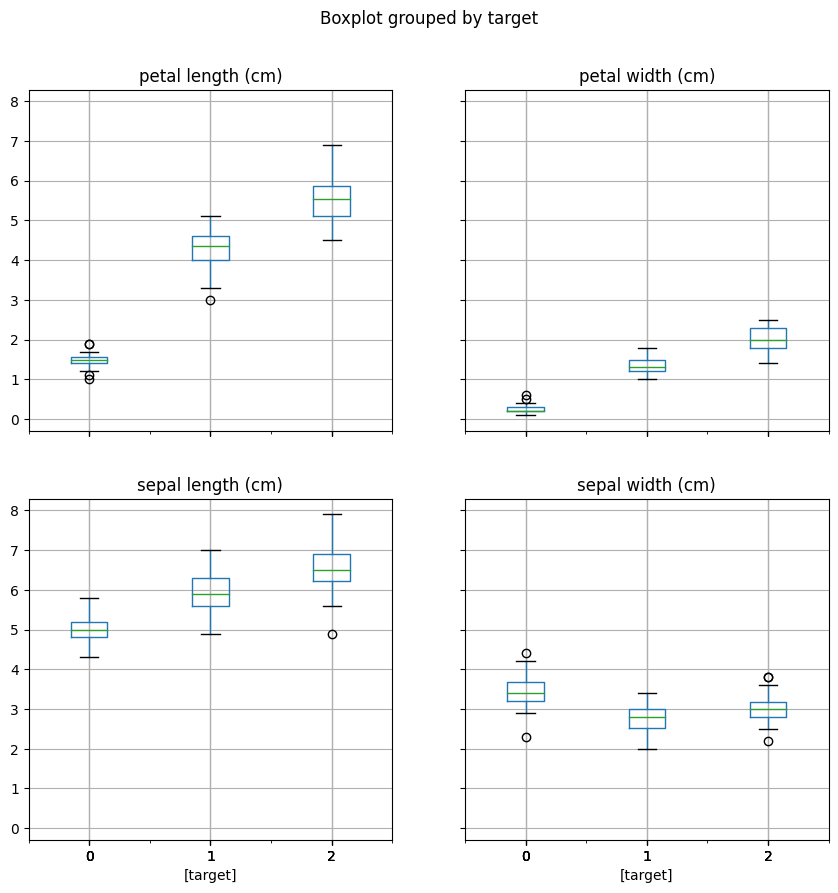

In [25]:
data.boxplot(by="target", layout=(2, 2), figsize=(10, 10))
plt.show()

In [27]:
X = data.drop(columns = ['target'])

In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [31]:
cov = (X.T @ X) / (X.shape[0] - 1)

In [32]:
cov

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),35.059396,17.942483,23.380940,7.571409
sepal width (cm),17.942483,9.600000,11.236913,3.569732
petal length (cm),23.380940,11.236913,17.333624,5.832953
petal width (cm),7.571409,3.569732,5.832953,2.029060


In [34]:
eig_values, eig_vectors = np.linalg.eig(cov)
print(eig_values)
print(eig_vectors)

[6.18007052e+01 2.11714306e+00 8.03895497e-02 2.38427530e-02]
[[ 0.75110816  0.2841749   0.50215472  0.32081425]
 [ 0.38008617  0.5467445  -0.67524332 -0.31725607]
 [ 0.51300886 -0.70866455 -0.05916621 -0.48074507]
 [ 0.16790754 -0.34367081 -0.53701625  0.75187165]]


In [35]:
idx = np.argsort(eig_values, axis=0)[::-1]
sorted_eig_vectors = eig_vectors[:, idx]

In [37]:
eig_scores = np.dot(X, sorted_eig_vectors[:, :2])

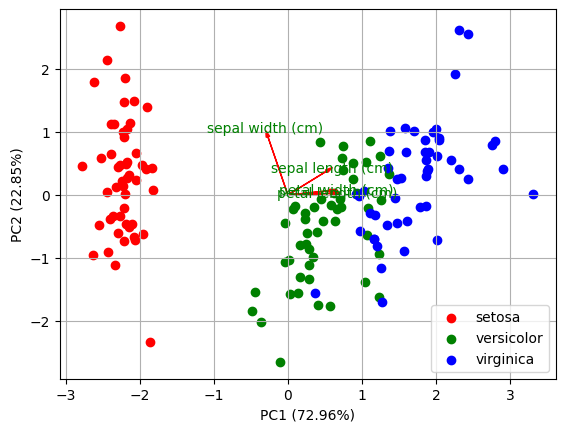

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
scores = pca.fit_transform(scaled_X)
coeff = pca.components_.T
explained_variance = pca.explained_variance_ratio_


def biplot(score, coeff, labels, target_names):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    colors = ['r', 'g', 'b'] 

    for i, target_name in enumerate(target_names):
        xi = [score[j, 0] for j in range(score.shape[0]) if data['target'].tolist()[j] == i]
        yi = [score[j, 1] for j in range(score.shape[0]) if data['target'].tolist()[j] == i]
        plt.scatter(xi, yi, c=colors[i], label=target_name)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', head_width=0.05, head_length=0.1)
        plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel('PC1 ({:.2f}%)'.format(explained_variance[0] * 100))
    plt.ylabel('PC2 ({:.2f}%)'.format(explained_variance[1] * 100))
    plt.grid()
    plt.legend()
    plt.show()

# Plot the biplot
biplot(scores, coeff, iris['feature_names'], iris['target_names'])

# USING SVD instad of covariance matrix

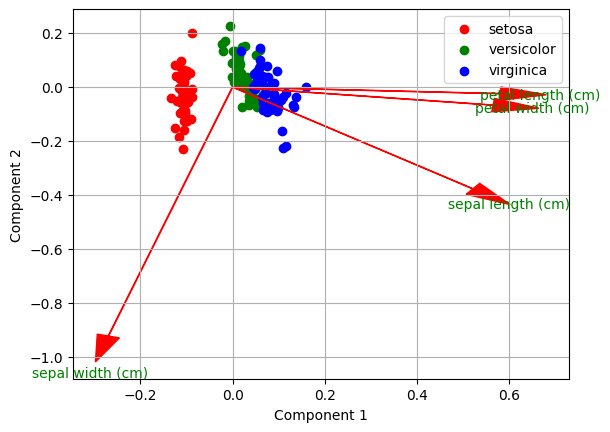

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[iris['feature_names']])


U, S, VT = np.linalg.svd(X_scaled, full_matrices=False)
scores = U[:, :2]  
coeff = VT.T[:, :2]  

def biplot(score, coeff, labels, target_names):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    colors = ['r', 'g', 'b']  

    for i, target_name in enumerate(target_names):
        xi = [score[j, 0] for j in range(score.shape[0]) if df['target'].tolist()[j] == i]
        yi = [score[j, 1] for j in range(score.shape[0]) if df['target'].tolist()[j] == i]
        plt.scatter(xi, yi, c=colors[i], label=target_name)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', head_width=0.05, head_length=0.1)
        plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid()
    plt.legend()
    plt.show()

biplot(scores, coeff, iris['feature_names'], iris['target_names'])
